In [1]:
import numpy as np
import pandas
from pandas import read_csv
import glob
import os
from scipy import stats
import csv
import psycopg2

In [8]:
raw_data_dir = 'E:/raw_data'
stat_data_dir = 'E:/stat_data'
sample_dir = 'E:/exp_raw_data' # directory for creating a sample 
name_simple_stat = 'simple_stat.csv'
name_spilt_up_stat = 'split_up_stat.csv'
name_quality_data = 'quality_data.csv'
name_figures_dir = 'E:/figures'


# define variables
# defined time for start and finish of drilling
prop_entry_phase = 0.15 # duration of initial drilling phase relative to duration of time series
prop_final_phase = 0.15 # duration of final drilling phase relative to duration of time series
save_fig = True # set True or False to save figures to figures_dir


# define necessary functions
# find real start and stop of drilling
def real_start_stop(bh_file):
    # number of previous measuring points for the mean thrust force calculation
    no_for_mean = 200
    # start of drilling is defined to be after 2/3 of this intervall
    correction = round(no_for_mean*2/3)
    # force average at real start/ end of drilling
    force_avg_s_e = 100
    counter = 0
    data = read_csv(raw_data_dir +'//'+ bh_file)
    data_array = data.to_numpy()
    flipped_data = np.flip(data_array, axis=0)
    for i in range(no_for_mean, np.shape(data_array)[0]):
        force_avg = np.mean(data_array[(i-no_for_mean):i,1])
        if force_avg>force_avg_s_e:
            real_start = data_array[(i-correction),0]
            counter = 1
            break
        else:
            pass
    # looping from back up time series to find the end of the drilling process
    if counter==1:
        for i in range(no_for_mean, np.shape(flipped_data)[0]):
            force_avg = np.mean(flipped_data[(i-no_for_mean):i,1])
            if force_avg>force_avg_s_e:
                real_stop = flipped_data[(i-correction),0]
                counter = 2
                break
    else:
        pass
    if counter==0 or counter ==1:
        real_start = None
        real_stop = None
    else:
        pass
    return real_start, real_stop
        
# calculate statistical data
# for whole drilling process
def simple_stat_calc(bh_file, real_start, real_stop):
    if real_start!=None and real_stop!=None:
        df = read_csv(raw_data_dir +'//'+ bh_file)
        query = '%f <= ts <= %f' % (real_start, real_stop)
        real_drilling_df = df.query(query)
        data_array = real_drilling_df.to_numpy()[:,1]
        ### possible further statistical data: skewness, curtosis, slope of lin. regr.
        return [np.mean(data_array), np.std(data_array)], real_drilling_df
    else:
        return [None, None], np.array([[]])
                

# for split up drilling process
def split_up_stat_calc(bh_file, real_start, real_stop):
    if real_start!=None and real_stop!=None:
        df = read_csv(raw_data_dir +'//'+ bh_file)
        end_entry_phase = prop_entry_phase * (real_stop - real_start)
        beginning_final_phase = prop_final_phase * (real_stop - real_start)
        query = '%f <= ts <= %f' % (real_start, real_start + end_entry_phase)
        real_drilling_df = df.query(query)
        data_array_1 = real_drilling_df.to_numpy()[:,1]
        query = '%f <= ts <= %f' % (real_start + end_entry_phase, real_stop - beginning_final_phase)
        real_drilling_df = df.query(query)
        data_array_2 = real_drilling_df.to_numpy()[:,1]
        query = '%f <= ts <= %f' % (real_stop - beginning_final_phase, real_stop)
        real_drilling_df = df.query(query)
        data_array_3 = real_drilling_df.to_numpy()[:,1]
        return [np.mean(data_array_1), np.std(data_array_1), np.mean(data_array_2), np.std(data_array_2), np.mean(data_array_3), np.std(data_array_3)]
    else:
        return [None, None, None, None, None, None]

borehole file:  0296211d-0661-4112-96d8-f9d5fc5354e2.csv
real start and real stop of drilling:  1531848050.37621 1531848055.51442
Mean and standard dev. for whole drilling: [119.5542739066561, 170.5349327409811]
Mean and standard dev. for each phase: [68.11688071711531, 92.62482147799847, 138.57368370441444, 192.70594785179694, 82.2806094135905, 79.32956143097454]


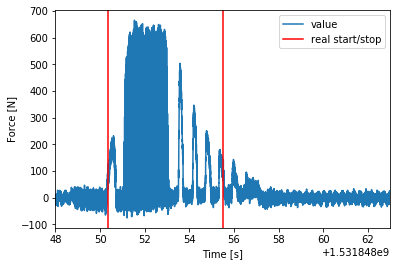

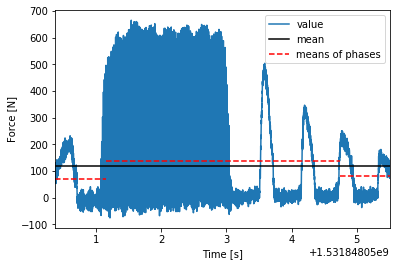

____________________________________________________________________________________________________
borehole file:  06899036-757c-470a-b4d9-d73549ff4df1.csv
real start and real stop of drilling:  1529932379.28844 1529932381.7221
Mean and standard dev. for whole drilling: [87.05576464476243, 114.14727035026817]
Mean and standard dev. for each phase: [42.67868800027034, 53.18015506307682, 99.98789560262402, 127.33038825695532, 71.13778225255612, 73.35977643813763]


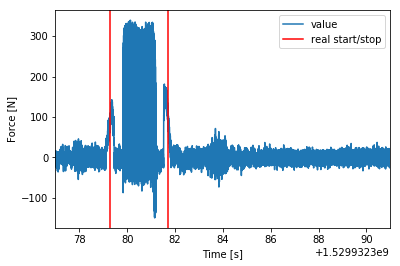

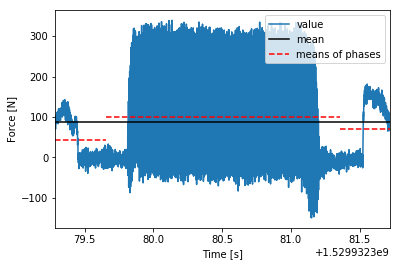

____________________________________________________________________________________________________
borehole file:  2217185e-71ee-4244-83ba-0b2a3f82ab08.csv
real start and real stop of drilling:  1526996950.30606 1526996969.1423302
Mean and standard dev. for whole drilling: [243.72358823181236, 318.2377262203258]
Mean and standard dev. for each phase: [143.27129857213066, 111.79912542573769, 298.8174858700567, 362.246187841766, 87.04654650592194, 38.521672380017606]


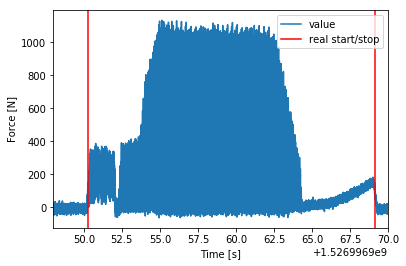

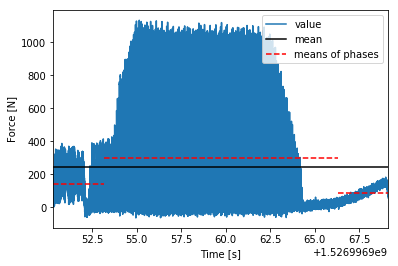

____________________________________________________________________________________________________
borehole file:  2358265c-6bde-4191-8430-16ad06a527ed.csv
real start and real stop of drilling:  1523375564.36674 1523375573.47872
Mean and standard dev. for whole drilling: [180.24532605369012, 195.4272017887068]
Mean and standard dev. for each phase: [173.56574905063903, 189.71568972855437, 184.48212755206524, 199.25960956696778, 167.14851201584435, 181.74472042976356]


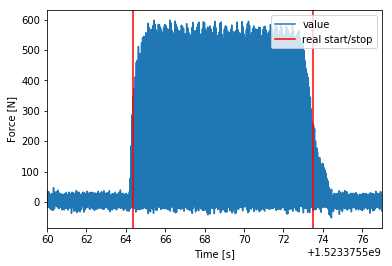

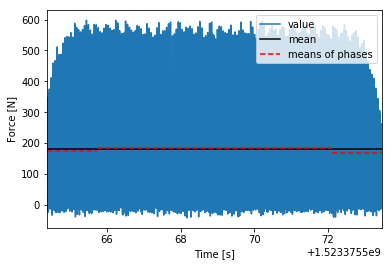

____________________________________________________________________________________________________
borehole file:  309969b9-6ab7-4faf-9b01-c65b16de7231.csv
real start and real stop of drilling:  1523379077.69963 1523379087.27347
Mean and standard dev. for whole drilling: [211.51268245577663, 229.8939330965872]
Mean and standard dev. for each phase: [201.31112874715677, 220.4147001803461, 219.82222420662154, 236.93605889328688, 182.94890790592996, 201.34826515380993]


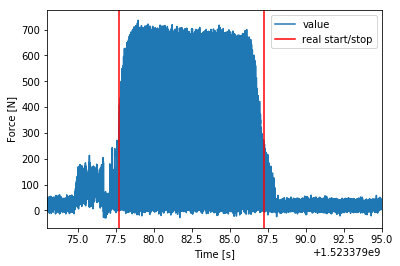

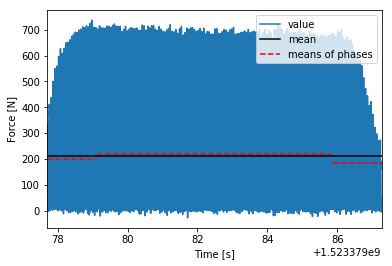

____________________________________________________________________________________________________


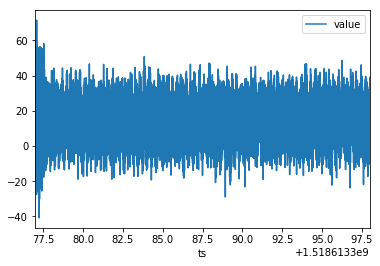

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  313945f2-0d8c-477b-afac-2a0dbb753697.csv
real start and real stop of drilling:  1523382179.88265 1523382189.8952599
Mean and standard dev. for whole drilling: [262.7390557962743, 292.5120999628635]
Mean and standard dev. for each phase: [236.7302708357332, 271.2381410156301, 281.0888119069775, 304.6455925282581, 203.13448435908964, 240.7304947291506]


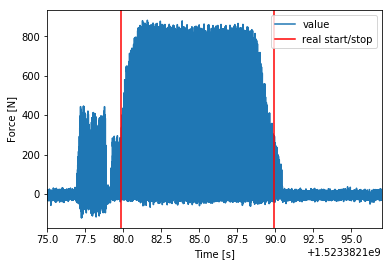

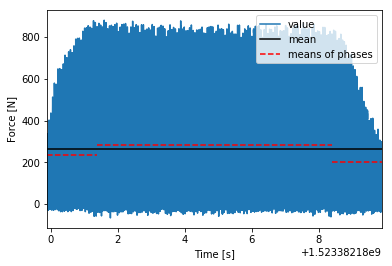

____________________________________________________________________________________________________
borehole file:  371873d4-4322-4d59-be5f-ea662895d98d.csv
real start and real stop of drilling:  1518607584.35674 1518607585.0023699
Mean and standard dev. for whole drilling: [790.973704706544, 367.132847846875]
Mean and standard dev. for each phase: [326.66476359205666, 318.3415873104132, 1002.0130532598895, 111.58222853022882, 268.0997364963524, 207.63819843464535]


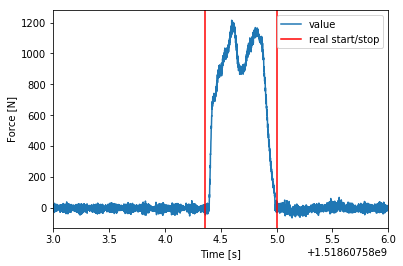

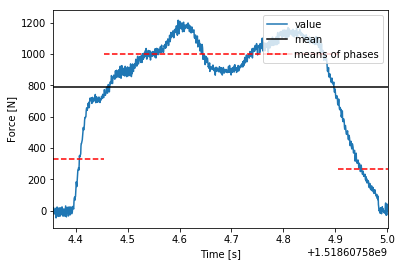

____________________________________________________________________________________________________
borehole file:  380559c7-6a0d-404c-aab6-f076cebf8f6a.csv
real start and real stop of drilling:  1519126850.23386 1519126859.84744
Mean and standard dev. for whole drilling: [500.7784874023351, 434.1225278235407]
Mean and standard dev. for each phase: [456.12564970065444, 399.109398573605, 543.6120688396383, 448.6577991570313, 345.55181063558234, 350.87440001778714]


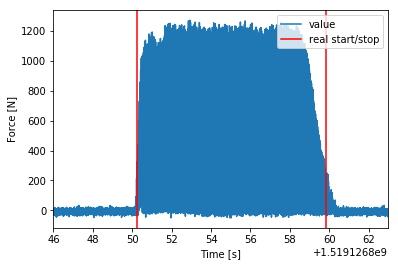

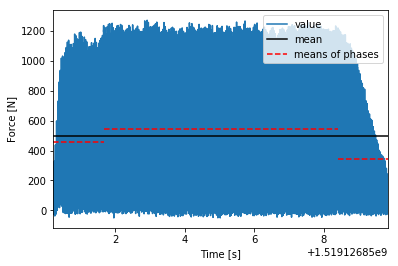

____________________________________________________________________________________________________


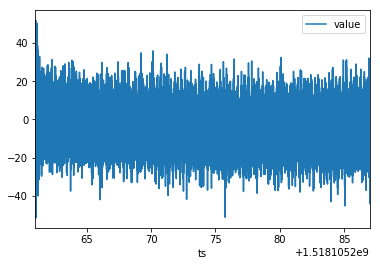

no start and stop of drilling could be detected 

____________________________________________________________________________________________________


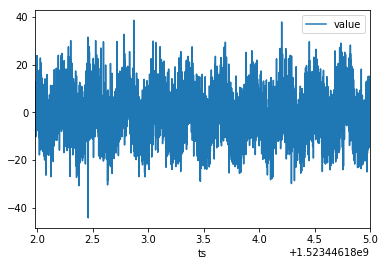

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  521789d0-1012-4a9c-ab5d-b04353e4f42e.csv
real start and real stop of drilling:  1523369275.11823 1523369277.0217
Mean and standard dev. for whole drilling: [158.93648981622005, 135.51516798033848]
Mean and standard dev. for each phase: [138.90596040292814, 122.33265259864916, 164.5395889332472, 139.28004542375024, 152.8714666984626, 127.90962684554162]


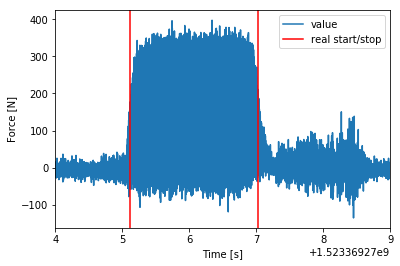

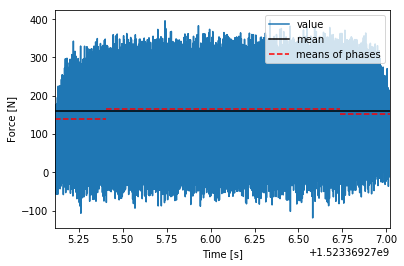

____________________________________________________________________________________________________
borehole file:  5270456e-56a3-4d0a-b967-a47e1cc5bcac.csv
real start and real stop of drilling:  1529940515.98379 1529940536.84766
Mean and standard dev. for whole drilling: [44.34945456197735, 71.96125789629352]
Mean and standard dev. for each phase: [75.94540367509978, 81.70180923922642, 26.195382271941213, 58.76801075960161, 97.46499002853196, 79.82691676411005]


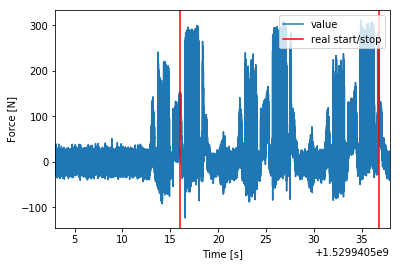

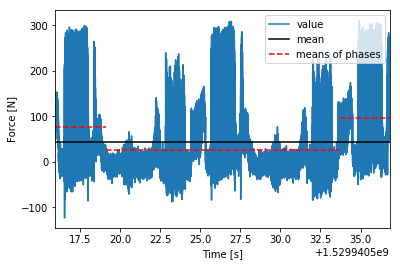

____________________________________________________________________________________________________


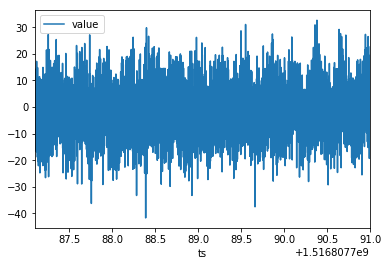

no start and stop of drilling could be detected 

____________________________________________________________________________________________________


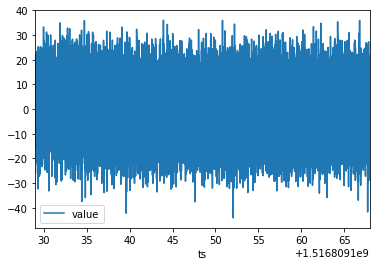

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  627356e2-e1f6-4881-8bfb-ce5c2a256fc5.csv
real start and real stop of drilling:  1523379548.18863 1523379561.0982802
Mean and standard dev. for whole drilling: [246.863977413648, 274.89485615025393]
Mean and standard dev. for each phase: [137.20646337981034, 68.78365580450745, 274.9175207697265, 300.37495393720195, 225.59946533598554, 248.6894569967346]


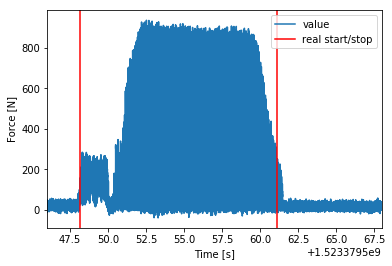

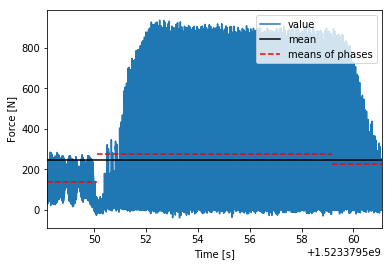

____________________________________________________________________________________________________
borehole file:  627922cd-6be8-4ea7-bf2c-fe826900a05e.csv
real start and real stop of drilling:  1534850283.0039 1534850318.23977
Mean and standard dev. for whole drilling: [466.9940245397929, 446.75223304568993]
Mean and standard dev. for each phase: [206.00029869085168, 277.8138729651436, 516.7307262481985, 458.45251145800455, 495.864726171395, 438.25833080389606]


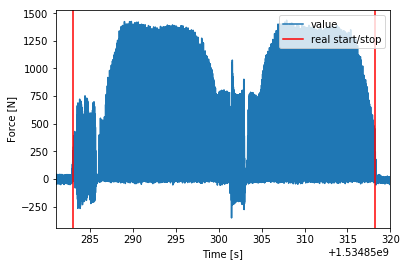

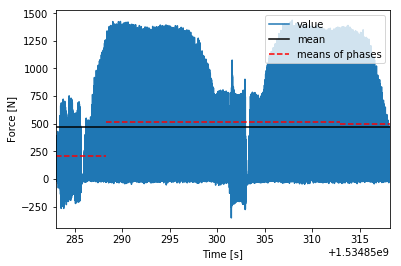

____________________________________________________________________________________________________
borehole file:  667871c6-7ff6-46c4-91e1-b89845942b76.csv
real start and real stop of drilling:  1518618531.28795 1518618531.9983099
Mean and standard dev. for whole drilling: [299.2991236913384, 213.7138211620568]
Mean and standard dev. for each phase: [230.94094192605672, 174.3165846861156, 331.90801451141476, 216.88790239583707, 216.27743587537512, 195.36137958841894]


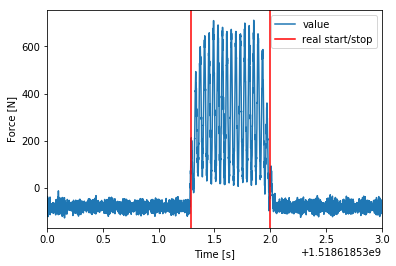

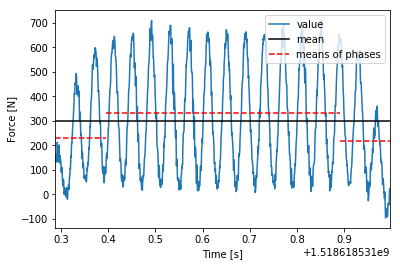

____________________________________________________________________________________________________
borehole file:  675585b1-923c-40af-a68e-626c7d461b61.csv
real start and real stop of drilling:  1536322757.2070198 1536322792.5822
Mean and standard dev. for whole drilling: [607.4522546866314, 514.573091906651]
Mean and standard dev. for each phase: [246.24171978488405, 327.54517997794744, 681.7741428586243, 520.6810786484192, 621.8152664209038, 486.13093975332816]


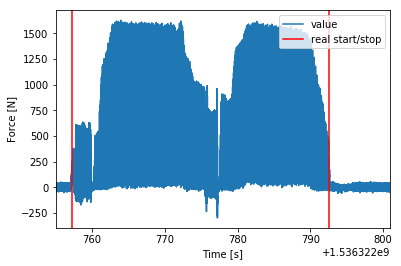

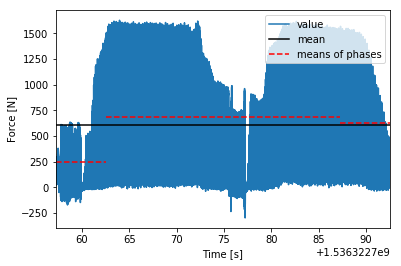

____________________________________________________________________________________________________
borehole file:  683209e8-fffe-4198-b29d-f409fc5496db.csv
real start and real stop of drilling:  1518092014.46922 1518092014.96101
Mean and standard dev. for whole drilling: [392.8026680627333, 173.35514643569982]
Mean and standard dev. for each phase: [171.87549332478852, 163.04289655817198, 494.31823310181426, 24.853475996612936, 141.1337325849566, 102.11635360133378]


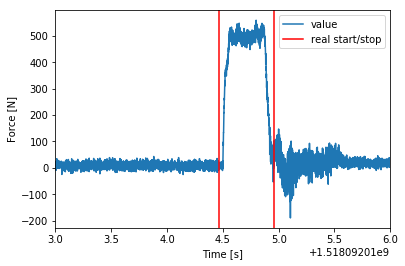

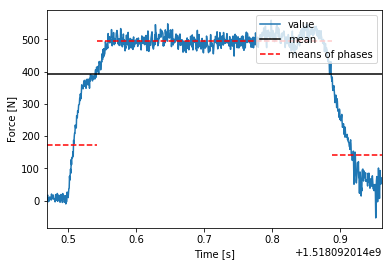

____________________________________________________________________________________________________
borehole file:  6853e679-9cab-415e-b87a-950a43231ec4.csv
real start and real stop of drilling:  1518116002.72123 1518116058.96635
Mean and standard dev. for whole drilling: [1575.0956722453316, 90.35382765492803]
Mean and standard dev. for each phase: [1592.8362602450702, 227.99103990675263, 1575.9506754477027, 18.416530318035043, 1553.3652382007228, 8.416028061577675]


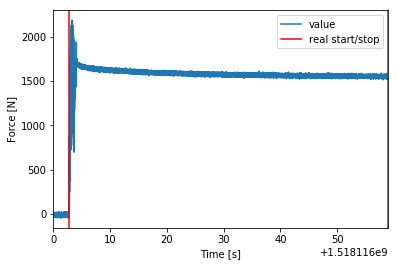

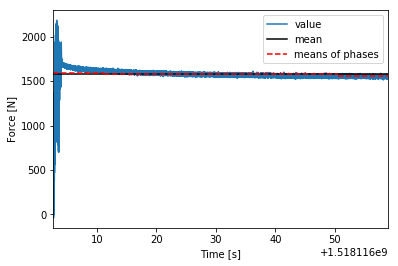

____________________________________________________________________________________________________


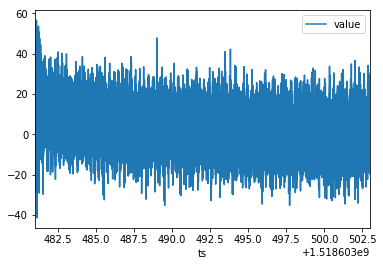

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  7015061b-8e10-498e-8159-9e174d756d59.csv
real start and real stop of drilling:  1538584627.6035302 1538584658.1925
Mean and standard dev. for whole drilling: [389.0876103452237, 390.14618294331666]
Mean and standard dev. for each phase: [156.85811701945747, 214.13824525199541, 414.9255918751632, 393.75251914517696, 500.7454875613543, 419.36558347302014]


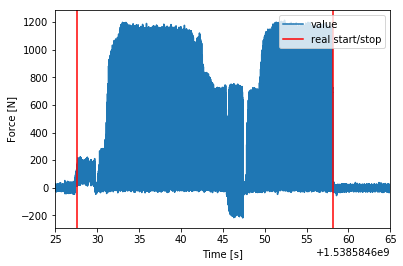

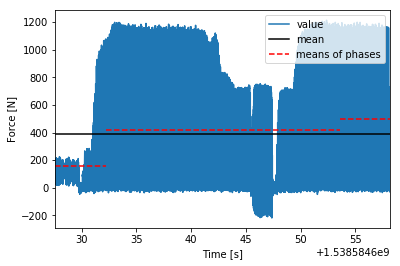

____________________________________________________________________________________________________


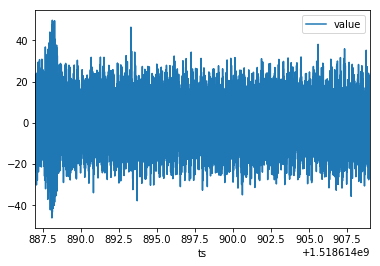

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  7282286a-739a-4ba2-9b5d-2ad492a10c75.csv
real start and real stop of drilling:  1523369235.8664699 1523369237.78655
Mean and standard dev. for whole drilling: [163.8621391002013, 140.96038327814176]
Mean and standard dev. for each phase: [144.05584760188077, 123.19787715304597, 169.6550623812529, 145.09737360828083, 156.67923170149515, 135.82494192388035]


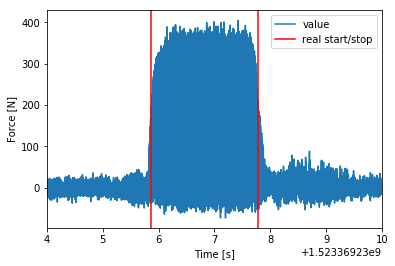

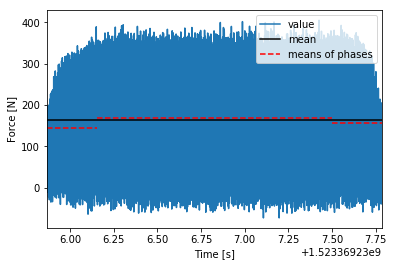

____________________________________________________________________________________________________
borehole file:  729472d2-2593-4c60-8d73-645b5184bf78.csv
real start and real stop of drilling:  1534847044.60185 1534847079.84465
Mean and standard dev. for whole drilling: [421.28912422646357, 420.3720677652361]
Mean and standard dev. for each phase: [189.59371891099917, 261.8598551084995, 467.94731446012446, 433.4528257883807, 435.25234273051177, 410.7311950753895]


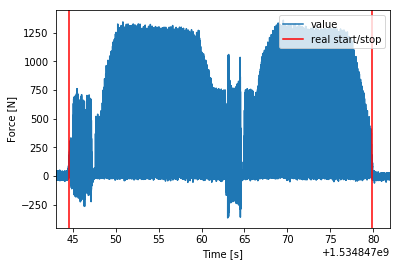

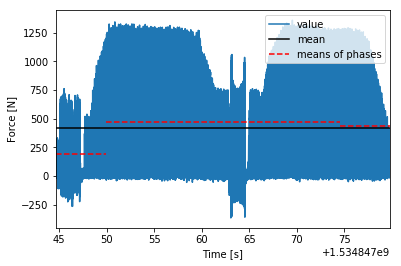

____________________________________________________________________________________________________
borehole file:  736777b3-19f3-4395-94ed-77eb8f9bb054.csv
real start and real stop of drilling:  1518607502.68151 1518607530.46523
Mean and standard dev. for whole drilling: [94.36643854515796, 173.3896281138661]
Mean and standard dev. for each phase: [121.99200957236039, 305.4161535846921, 92.99001041946843, 143.4242022795736, 73.16679726555294, 99.66454564796308]


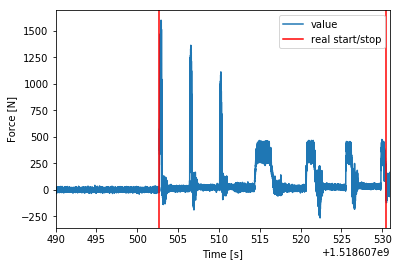

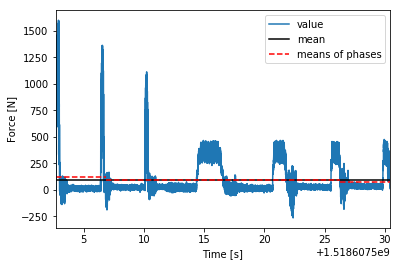

____________________________________________________________________________________________________


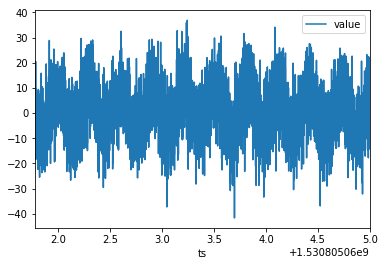

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  748506d4-d7cb-44d0-abbf-7fd07973b3d2.csv
real start and real stop of drilling:  1530013507.15335 1530013510.53888
Mean and standard dev. for whole drilling: [133.5317758180142, 82.30273516154134]
Mean and standard dev. for each phase: [117.22665568125504, 34.20256369609734, 140.74800374602904, 91.36745863367057, 116.19378667256306, 65.04287492545231]


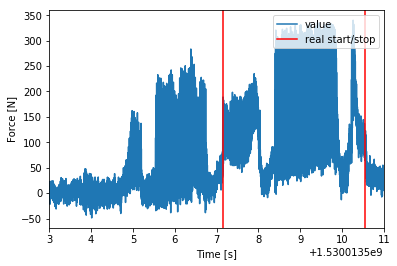

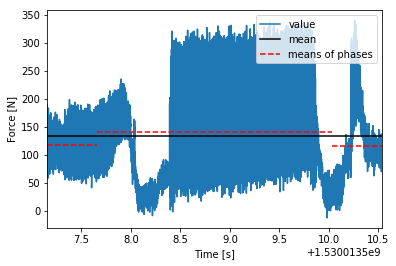

____________________________________________________________________________________________________


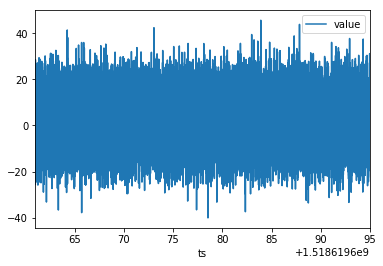

no start and stop of drilling could be detected 

____________________________________________________________________________________________________


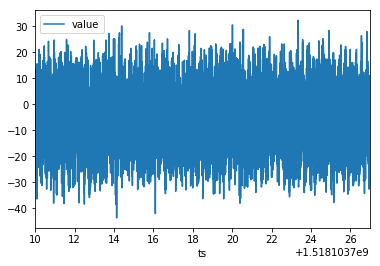

no start and stop of drilling could be detected 

____________________________________________________________________________________________________


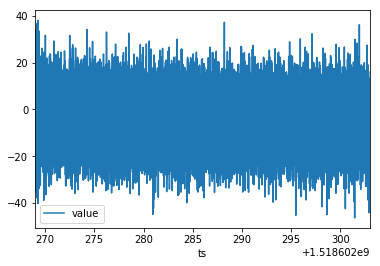

no start and stop of drilling could be detected 

____________________________________________________________________________________________________


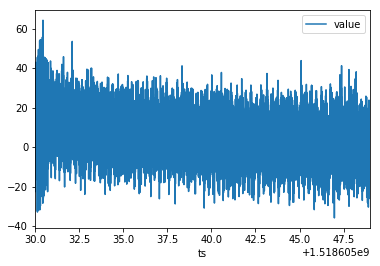

no start and stop of drilling could be detected 

____________________________________________________________________________________________________
borehole file:  837229e6-24a5-468c-a907-0ae6759d7358.csv
real start and real stop of drilling:  1518620967.11259 1518620968.0868402
Mean and standard dev. for whole drilling: [412.425052908602, 172.2869209961009]
Mean and standard dev. for each phase: [295.0855831429754, 180.29569375576258, 473.24180134511, 137.42837359208963, 245.50553323139175, 135.58225956888893]


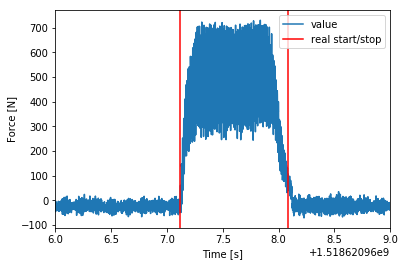

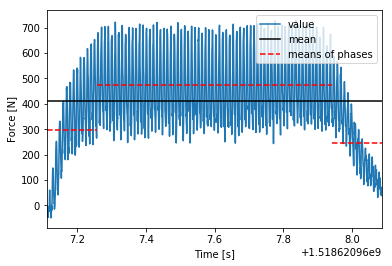

____________________________________________________________________________________________________
borehole file:  860995c0-e219-4749-ae1e-f97273e1759b.csv
real start and real stop of drilling:  1518606348.7689 1518606349.1506698
Mean and standard dev. for whole drilling: [410.42329379398035, 239.47400315728655]
Mean and standard dev. for each phase: [88.99063029553044, 96.73531520344913, 547.4467772192523, 130.65721042294388, 97.12323060261207, 59.188825978785104]


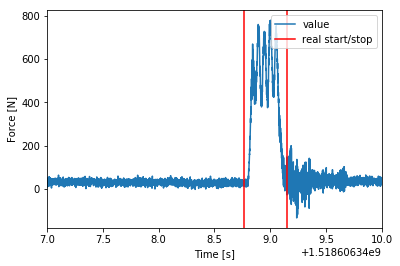

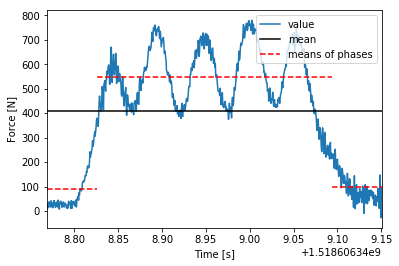

____________________________________________________________________________________________________
borehole file:  904296b2-83ae-4dd7-b709-5154dcbf8315.csv
real start and real stop of drilling:  1518620904.99331 1518620906.75916
Mean and standard dev. for whole drilling: [208.21745516029142, 255.8253137025677]
Mean and standard dev. for each phase: [193.71628839723095, 221.8068183929732, 218.68215904119367, 267.6797036726465, 173.90966344487964, 225.503653554311]


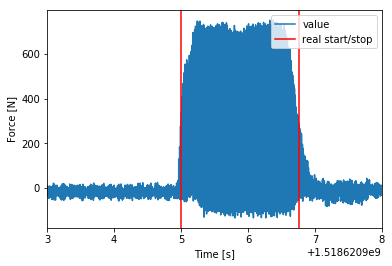

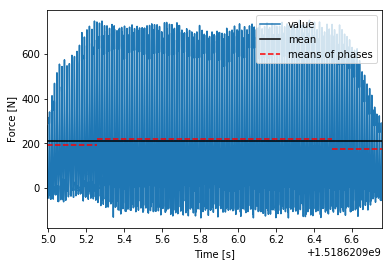

____________________________________________________________________________________________________
borehole file:  934965b0-b7d3-4737-8286-1730c6ea3699.csv
real start and real stop of drilling:  1524573161.17996 1524573170.71432
Mean and standard dev. for whole drilling: [208.67576486991993, 240.99866194945008]
Mean and standard dev. for each phase: [192.64687491624872, 226.1198439496482, 217.44016316760838, 248.30318419632027, 183.83473608792355, 217.09815219860178]


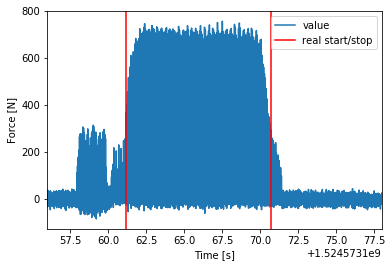

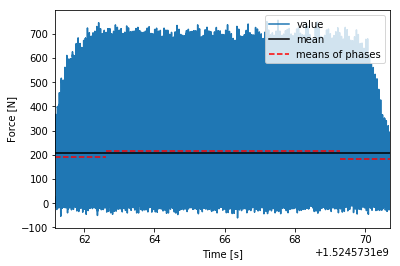

____________________________________________________________________________________________________


In [9]:
# sample of a few complete time series plots, cut time series plots and the statistical calculations
import matplotlib.pyplot as plt
def test_stat_calc(borehole):
    df = read_csv(sample_dir +'//'+ borehole)
    #print (df)
    real_start, real_stop = real_start_stop(borehole)
    if real_start!= None:
        end_entry_phase = prop_entry_phase * (real_stop - real_start)
        beginning_final_phase = prop_final_phase * (real_stop - real_start)
        simple_stat, cut_df = simple_stat_calc(borehole, real_start, real_stop)
        split_up_stat = split_up_stat_calc(borehole, real_start, real_stop)
        print ('borehole file: ',borehole)
        print ('real start and real stop of drilling: ', real_start, real_stop)
        #print (cut_df)
        print ('Mean and standard dev. for whole drilling:', simple_stat)
        print ('Mean and standard dev. for each phase:', split_up_stat)
    else:
        pass
    
    df.plot(x='ts', y='value')
    if real_start!= None:
        plt.axvline(x=real_start, color='r', label = 'real start/stop')
        plt.axvline(x=real_stop, color='r')
        plt.legend(loc='upper right')
        plt.xlabel("Time [s]")
        plt.ylabel("Force [N]")
    bh_name = borehole.strip('.csv')
    # save as png in figures directory
    if save_fig==True:
        plt.savefig(name_figures_dir +'//'+ bh_name + '_all.png', dpi=400)
    plt.show()
    try:
        cut_df.plot(x='ts', y='value')
        plt.xlabel("Time [s]")
        plt.ylabel("Force [N]")
        phasechange1 = end_entry_phase/(real_stop-real_start)
        phasechange2 = (real_stop-real_start-beginning_final_phase)/(real_stop-real_start)
        plt.axhline(y=simple_stat[0], xmin=0, xmax=1, linestyle='-', color='0', label='mean')
        plt.axhline(y=split_up_stat[0],xmin=0,xmax=phasechange1, linestyle='--', color='r', label='means of phases')
        plt.axhline(y=split_up_stat[2],xmin=phasechange1,xmax=phasechange2, linestyle='--', color='r')
        plt.axhline(y=split_up_stat[4],xmin=phasechange2,xmax=1, linestyle='--', color='r')
        plt.legend(loc='upper right')
        if save_fig==True:
            plt.savefig(name_figures_dir +'//'+ bh_name + '_cut.png', dpi=400)
        plt.show()
    except:
        print ('no start and stop of drilling could be detected \n')

test_boreholes = os.listdir(sample_dir)
for bh in test_boreholes:
    test_stat_calc(bh)
    print ('_' * 100)

In [10]:
# read csv data, calculate statistical data and save statistical data to csv
if name_simple_stat and name_spilt_up_stat in os.listdir(stat_data_dir):
    print ('The statistical data is already saved in the directory!')
else:
    simple_stat_data = []
    split_up_stat_data = []
    import progressbar
    counter = 0
    # writing headers in csv files
    with open (stat_data_dir +'//'+ name_simple_stat, 'w', newline='') as file_obj:
        writer = csv.writer(file_obj)
        writer.writerow(['borehole_id','mean','stddev'])
    with open (stat_data_dir +'//'+ name_spilt_up_stat, 'w', newline='') as file_obj:
        writer = csv.writer(file_obj)
        writer.writerow(['borehole_id','mean_entry','stddev_entry','mean_main','stddev_main','mean_end','stddev_end'])
    with progressbar.ProgressBar(max_value=len(os.listdir(raw_data_dir))) as bar:
        for bh_file in os.listdir(raw_data_dir):
            borehole_id = bh_file.replace('.csv', '')
            # find real start and stop of drilling
            real_start, real_stop = real_start_stop(bh_file)
            # calculate and save statistical data
            # stat arrays include borehole_id as first entry
            simple_stat, _ = simple_stat_calc(bh_file, real_start, real_stop)
            simple_stat_entry = [borehole_id] + simple_stat
            split_up_stat = split_up_stat_calc(bh_file, real_start, real_stop)
            spilt_up_stat_entry = [borehole_id] + split_up_stat

            # append the statistical data to csv files
            with open (stat_data_dir +'//'+ name_simple_stat, 'a', newline='') as file_obj:
                writer = csv.writer(file_obj)
                writer.writerow(simple_stat_entry)
            with open (stat_data_dir +'//'+ name_spilt_up_stat, 'a', newline='') as file_obj:
                writer = csv.writer(file_obj)
                writer.writerow(spilt_up_stat_entry)
            # update progress
            counter += 1
            bar.update(counter)
            

100% (1704 of 1704) |####################| Elapsed Time: 0:22:27 Time:  0:22:27


In [31]:
# import and save the corresponding quality data
if name_quality_data not in os.listdir(stat_data_dir):
    conn = psycopg2.connect() # database access data cannot be published
    cur = conn.cursor()
    simpleStatData = read_csv(stat_data_dir +'//'+ name_simple_stat)
    boreholeLst = simpleStatData['borehole_id'].tolist()

    qualitydata = []
    for borehole in boreholeLst:
        #print (borehole)
        query = "select borehole, burr_height_in, burr_height_out, roughness_ra_mean, roughness_ra_s, roughness_rz_mean, \
                roughness_rz_s, diameter_zeiss_mean, diameter_zeiss_s, diameter_min, diameter_max, roundness_mean, \
                roundness_s, breakout_in, breakout_out from boeing_db_structure.qualitycards \
                where borehole = %s"
        arguments = (borehole, )
        cur.execute(query, arguments)
        print (cur.fetchall())
        qualitydata.append(cur.fetchall()[0])
    qualitydata_array = np.array(qualitydata)
    cur.close()
    # save as csv
    my_header = query.replace('select borehole', 'borehole_id').replace(' ','').replace('fromboeing_db_structure.qualitycardswhereborehole=%s','').split(',')
    pandas.DataFrame(qualitydata_array).to_csv(stat_data_dir +'//'+ name_quality_data, header=my_header)
else:
    print ('The quality data has already been retrieved.')

[]


IndexError: list index out of range